In [2]:
def range_query(a, b, data_structure):
    result = []
    for item in data_structure:
        if a <= item <= b:
            result.append(item)
    return result

#如果兩集合中元素相同且元素出現次數也相同就return yes, else return no
def equivalent(S1, S2):

    if set(S1) == set(S2):
        for item in set(S1):
            if S1.count(item) != S2.count(item):
                return "no"
        return "yes"
    return "no"

def print_multiset(S):

    print(*S)


#測試
data = [1, 2, 3, 4, 5, 2, 3, 4]
print(range_query(2, 4, data))  # [2, 3, 4, 2, 3, 4]
print(equivalent([1, 2, 2, 3], [2, 3, 1, 2]))  # yes
print_multiset([1, 2, 2, 3, 4])  # 1 2 2 3 4


[2, 3, 4, 2, 3, 4]
yes
1 2 2 3 4


###sorted array

In [3]:
class SortedArray:

    #初始化
    def __init__(self):
        self.array = []

    #insert方法:insert後排序
    def insert(self, value):
        self.array.append(value)
        self.array.sort()

    #range query:印出在start與end之間所有的數到result
    def range_query(self, start, end):
        result = []
        for num in self.array:
            if start <= num <= end:
                result.append(num)
            if num > end:
                break
        return result

    #刪除data
    def remove(self, value):
        if value in self.array:
            self.array.remove(value)
    #搜尋data
    def search(self, value):
        for value in self.array:
            if value in self.array:
                return True
        return False
    #印出
    def display(self):
        return self.array


#測試
sa = SortedArray()
sa.insert(3)
sa.insert(1)
sa.insert(4)
print(sa.display())  # [1, 3, 4]
sa.insert(3)
print(sa.range_query(1, 3)) # [1, 3, 3]
sa.remove(1)
print(sa.display())
sa.search(3)

[1, 3, 4]
[1, 3, 3]
[3, 3, 4]


True

###array of sorted arrays

In [11]:
class ArrayOfSortedArrays:

    #初始化
    def __init__(self):
        self.arrays = []

    #insert subarray 並排序
    def add_array(self, sub_array):
        sub_array.sort()
        self.arrays.append(sub_array)

    #range query:印出在start與end之間所有的數到result
    def range_query(self, start, end):
        result = []
        for sub_array in self.arrays:
            for num in sub_array:
                if start <= num <= end:
                    result.append(num)
                if num > end:
                    break
        return result

    #搜尋data
    def binary_search(self, target):
        for sorted_array in self.arrays:
            left, right = 0, len(sorted_array) - 1
            while left <= right:
                #計算中間值
                mid = left + (right - left) // 2
                if sorted_array[mid] == target:
                    return True  # 找到目標
                elif sorted_array[mid] < target:
                    left = mid + 1
                else:
                    right = mid - 1
        return False  # 未找到目標

    #印出
    def display(self):
        return self.arrays


#測試
asa = ArrayOfSortedArrays()
asa.add_array([3, 1, 4])
asa.add_array([7, 5, 9])
print(asa.display())  # [[1, 3, 4], [5, 7, 9]]
print(asa.binary_search(5))  # True
print(asa.binary_search(2))  # False
print(asa.range_query(3, 7)) #[3, 4, 5, 7]

[[1, 3, 4], [5, 7, 9]]
True
False
[3, 4, 5, 7]


###skip list

In [5]:
import random

class SkipListNode:

    #每個node都一個值與forward列表
    def __init__(self, value):
        self.value = value
        self.forward = []

class SkipList:
    def __init__(self):
        self.head = SkipListNode(-float('inf'))  #first node負無窮大
        self.tail = SkipListNode(float('inf'))  #last node正無窮大
        self.head.forward = [self.tail]
        self.max_level = 1

    def random_level(self):
        level = 1
        while random.random() < 0.5 and level < self.max_level + 1: #擲銅板決定是否增加level
            level += 1
        return level

    def insert(self, value):
      level = self.random_level()
      new_node = SkipListNode(value)
      new_node.forward = [None] * level  # 初始化new node的每個層級

      current = self.head
      update = [None] * level  # 記錄每個層級的前一個節點

      for i in range(self.max_level - 1, -1, -1): #從max level一路遞減到0的迴圈
          while len(current.forward) > i and current.forward[i] and current.forward[i].value < value: #持續向前移動current node，直到找到應該插入新節點的位置
            current = current.forward[i]
          if i < level:
            update[i] = current

      if level > self.max_level:  #如果新節點的level超過max level，則需要擴展skip list
          for i in range(self.max_level, level):
            self.head.forward.append(None)  # 增加新的 None 到 self.head.forward
          self.max_level = level #更新max level

      #在每個level中，更新前一個節點和新節點之間的連接，將新節點插入到skip list
      for i in range(level):
          if update[i] is not None:
              new_node.forward[i] = update[i].forward[i]
              update[i].forward[i] = new_node
          else:
              self.head.forward[i] = new_node

    def range_query(self, start, end):
        result = []
        current = self.head
        for i in range(self.max_level - 1, -1, -1):    #從first node開始，找到第一個大於或等於start的節點
            while current.forward[i] and current.forward[i].value < start:
                current = current.forward[i]      #持續向前移動 current 節點，直到找到大於或等於 start 的節點
        current = current.forward[0]              #將 current 更新為最底層的下一個節點，這是開始查詢範圍的地方

        while current and current.value <= end:
            result.append(current.value)
            current = current.forward[0]

        return result

    def display(self):
      result = []
      current = self.head.forward[0]
      while current != self.tail and current is not None:
          result.append(current.value)
          current = current.forward[0]
      return result



#測試
sl = SkipList()
sl.insert(3)
sl.insert(1)
sl.insert(4)
print(sl.display())  # [1, 3, 4]
print(sl.range_query(2, 4))

[1, 3, 4]
[3, 4]


###實驗

In [12]:
import random
import time

# 1. 設定 n 和 k
n = 2 ** 20 - 1                   #n = 2 ** 20 - 1
k_values = [2 ** i for i in range(21)]      #k_values = [2 ** i for i in range(21)]


# 2. 讀取外部檔案並存入三個資料結構
filepath = input("請輸入檔案路徑：")

with open(filepath, "r") as file:
    numbers = [int(line.strip()) for line in file] #將檔案中的所有數字放入一個list

sa = SortedArray()
asa = ArrayOfSortedArrays()
sl = SkipList()

for num in numbers:
    sa.insert(num)
    asa.add_array([num])
    sl.insert(num)

# 3. 隨機產生 a
a = random.randint(0, n - 1)

# 4. 執行 range_query 並測量時間
for k in k_values:

    # SortedArray
    sa_start_time = time.time()
    result_sa = sa.range_query(a, a + k)
    sa_end_time = time.time()

    # ArrayOfSortedArrays
    asa_start_time = time.time()
    result_asa = asa.range_query(a, a + k)
    asa_end_time = time.time()

    # SkipList
    sl_start_time = time.time()
    result_sl = sl.range_query(a, a + k)
    sl_end_time = time.time()

    print(f"k = {k}, sorted array range query taken time = {sa_end_time - sa_start_time:.6f} seconds")
    print(f"k = {k}, array of sorted arrays range query taken time = {asa_end_time - asa_start_time:.6f} seconds")
    print(f"k = {k}, skip list range query taken time = {sl_end_time - sl_start_time:.6f} seconds")

# 5. 檢查 equivalent
print("Equivalent Check:")
print(f"SortedArray vs ArrayOfSortedArrays: {equivalent(result_sa, result_asa)}")
print(f"SortedArray vs SkipList: {equivalent(result_sa, result_sl)}")
print(f"ArrayOfSortedArrays vs SkipList: {equivalent(result_asa, result_sl)}")


請輸入檔案路徑：/content/test1.txt
k = 1, sorted array range query taken time = 0.000009 seconds
k = 1, array of sorted arrays range query taken time = 0.000013 seconds
k = 1, skip list range query taken time = 0.000008 seconds
k = 2, sorted array range query taken time = 0.000011 seconds
k = 2, array of sorted arrays range query taken time = 0.000025 seconds
k = 2, skip list range query taken time = 0.000005 seconds
k = 4, sorted array range query taken time = 0.000010 seconds
k = 4, array of sorted arrays range query taken time = 0.000015 seconds
k = 4, skip list range query taken time = 0.000005 seconds
k = 8, sorted array range query taken time = 0.000010 seconds
k = 8, array of sorted arrays range query taken time = 0.000015 seconds
k = 8, skip list range query taken time = 0.000004 seconds
k = 16, sorted array range query taken time = 0.000009 seconds
k = 16, array of sorted arrays range query taken time = 0.000012 seconds
k = 16, skip list range query taken time = 0.000005 seconds
k = 3

###折線圖

In [7]:
pip install matplotlib

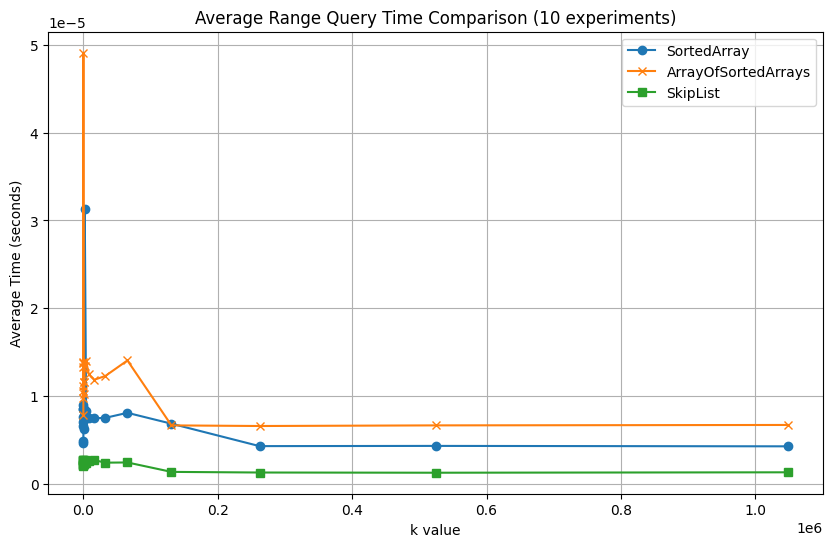

In [17]:
import matplotlib.pyplot as plt

times_sa = []
times_asa = []
times_sl = []


for k in k_values:

        # SortedArray
        sa_start_time = time.time()
        for _ in range(10):  # 重複10次
            result_sa = sa.range_query(a, a + k)
        sa_end_time = time.time()
        times_sa.append((sa_end_time - sa_start_time) / 10)  # 取平均

        # ArrayOfSortedArrays
        asa_start_time = time.time()
        for _ in range(10):
            result_asa = asa.range_query(a, a + k)
        asa_end_time = time.time()
        times_asa.append((asa_end_time - asa_start_time) / 10)

        # SkipList
        sl_start_time = time.time()
        for _ in range(10):
            result_sl = sl.range_query(a, a + k)
        sl_end_time = time.time()
        times_sl.append((sl_end_time - sl_start_time) / 10)

# 繪製圖表
plt.figure(figsize=(10, 6))
plt.plot(k_values, times_sa, label='SortedArray', marker='o')
plt.plot(k_values, times_asa, label='ArrayOfSortedArrays', marker='x')
plt.plot(k_values, times_sl, label='SkipList', marker='s')
plt.xlabel('k value')
plt.ylabel('Average Time (seconds)')
plt.title('Average Range Query Time Comparison (10 experiments)')
plt.legend()
plt.grid(True)
plt.show()
